In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

In [8]:
train=pd.read_csv('../dataset/fasionmnist/fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test=pd.read_csv('../dataset/fasionmnist/fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train.drop(columns = 'label')
y = train['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)
X_train = X_train / 255
X_val = X_val / 255
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)
y_train  = pd.get_dummies(y_train).values
y_val  = pd.get_dummies(y_val).values

In [18]:
model = Sequential()
model.add(Conv2D(32, 3, activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Conv2D(32, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [20]:
model.compile(
    loss = 'bce',
    optimizer = 'rmsprop',
    metrics = ['acc']
)

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    batch_size = 128,
    epochs = 30
)

Epoch 1/30
352/352 [==============================] - 14s 15ms/step - loss: 0.1569 - acc: 0.6624 - val_loss: 0.1858 - val_acc: 0.5601
Epoch 2/30
352/352 [==============================] - 5s 13ms/step - loss: 0.1002 - acc: 0.7920 - val_loss: 0.0812 - val_acc: 0.8295
Epoch 3/30
352/352 [==============================] - 5s 13ms/step - loss: 0.0882 - acc: 0.8217 - val_loss: 0.0657 - val_acc: 0.8646
Epoch 4/30
352/352 [==============================] - 5s 14ms/step - loss: 0.0806 - acc: 0.8381 - val_loss: 0.0631 - val_acc: 0.8721
Epoch 5/30
352/352 [==============================] - 5s 14ms/step - loss: 0.0758 - acc: 0.8506 - val_loss: 0.0676 - val_acc: 0.8551
Epoch 6/30
352/352 [==============================] - 5s 13ms/step - loss: 0.0726 - acc: 0.8576 - val_loss: 0.0597 - val_acc: 0.8777
Epoch 7/30
352/352 [==============================] - 5s 14ms/step - loss: 0.0691 - acc: 0.8652 - val_loss: 0.0552 - val_acc: 0.8877
Epoch 8/30
352/352 [==============================] - 5s 13ms/step -

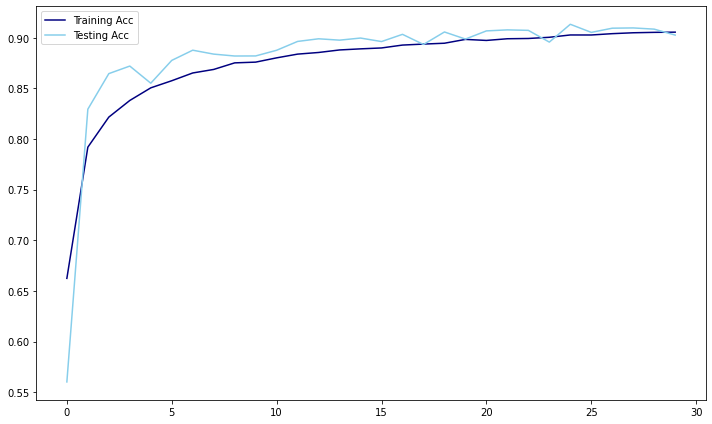

In [23]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['acc'], c= 'navy', label = 'Training Acc')
plt.plot(history.history['val_acc'], c= 'skyblue', label = 'Testing Acc')
plt.legend()

plt.tight_layout()
plt.savefig('../data_visualizations/acc-&-val-acc.jpg');

In [24]:
ans = test['label']
test = test.drop(columns = 'label')

test = test / 255
test = test.values.reshape(-1, 28, 28, 1)

In [25]:
pred_mx = model.predict(test)
preds = np.argmax(pred_mx, axis = 1)
preds[:10]

313/313 [==============================] - 1s 2ms/step


array([0, 1, 2, 6, 3, 6, 8, 6, 5, 0])

In [26]:
sub_data = zip([i+1 for i in range(len(test))], preds)
sub_df = pd.DataFrame(data = sub_data, columns = ['ImageId', 'Label'])
sub_df.head()

,ImageId,Label
0,1,0
1,2,1
2,3,2
3,4,6
4,5,3


In [27]:
cf_mx = confusion_matrix(ans, preds)

In [28]:
accuracy_score(ans, preds)

0.9101

In [29]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cf = pd.DataFrame(cf_mx, index = label_name, columns = label_name)

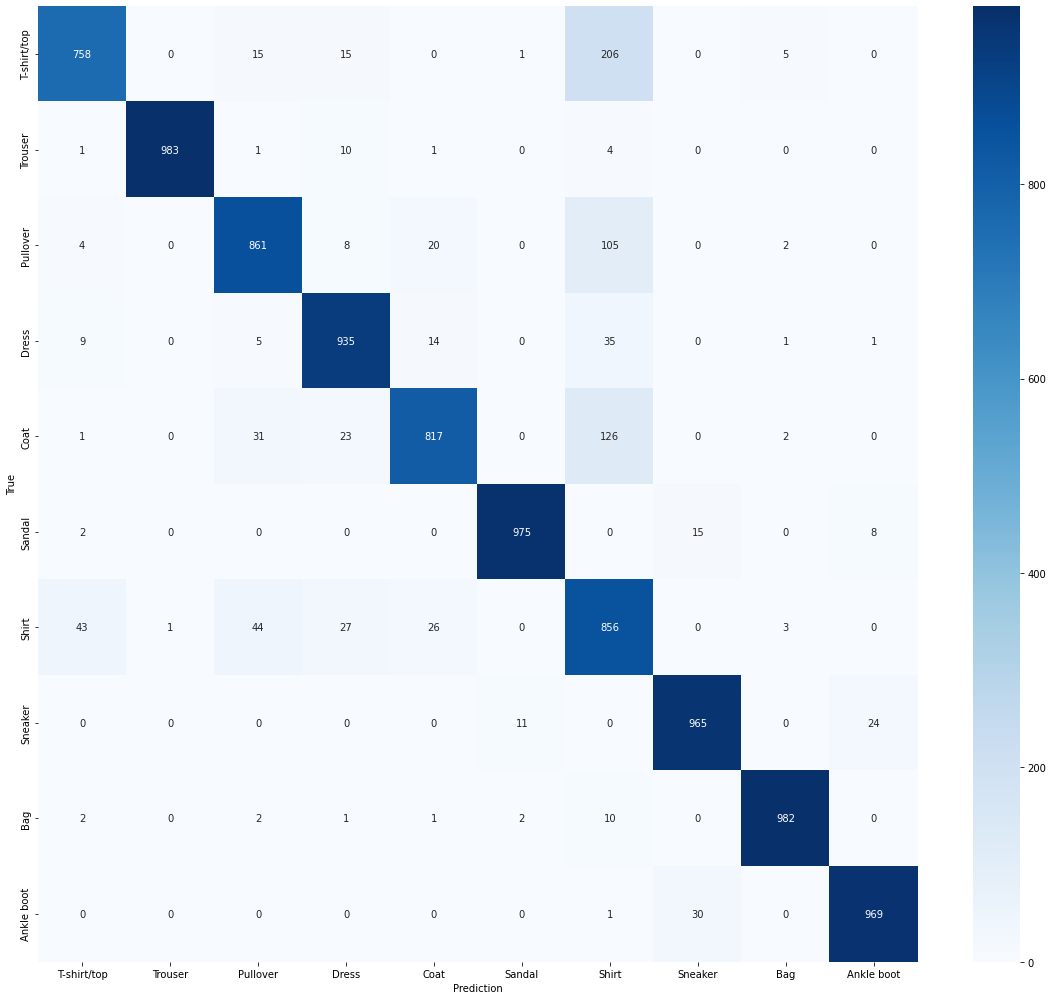

In [31]:
plt.figure(figsize = (16, 14))
sns.heatmap(cf, annot = True, cmap = 'Blues',fmt = 'g')
plt.xlabel('Prediction')
plt.ylabel('True')

plt.tight_layout()
plt.savefig('../dataset/cf.jpg');

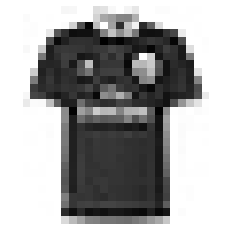

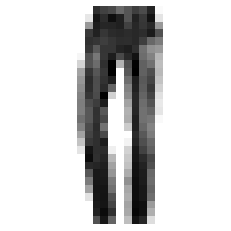

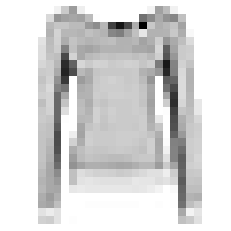

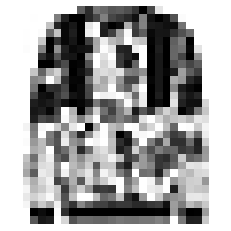

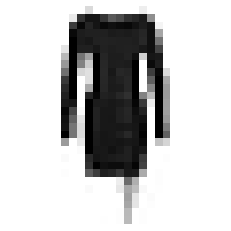

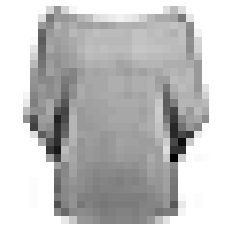

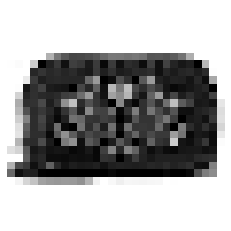

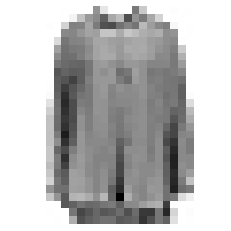

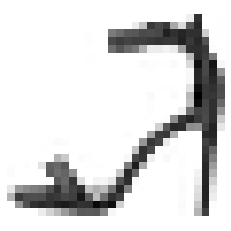

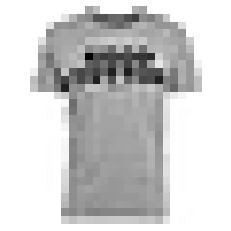

<Figure size 432x288 with 0 Axes>

In [33]:
for i in range(10):
    plt.clf()
    plt.axis('off')
    plt.imshow(test[i, :, :, 0], cmap = 'binary')
    plt.show();

plt.tight_layout()
plt.savefig('../dataset/tenlabel.jpg');  

469/469 [==============================] - 1s 2ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


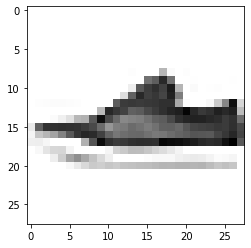

At index 0 predicted = 7, true = [0 0 0 0 0 0 0 1 0 0]


In [41]:
y_pred = np.argmax(model.predict(X_val), axis=1)

wrong_ix = np.where(y_pred != y_val)[0]
for i in wrong_ix[:200]:
    plt.clf()
    plt.imshow(X_val[i, :, :, 0], cmap='binary')
    plt.show()
    pred = y_pred[i]
    truth = y_val[i]
    print(f'At index {i} predicted = {pred}, true = {truth}')
    
plt.tight_layout()
plt.savefig('../dataset/wrong.jpg');  